In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pickle

In [5]:
#Loading data

df1 = pd.read_csv('client_data.csv')
df2 = pd.read_csv('price_data.csv')
df1

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


In [6]:
df1.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [7]:
df2.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [9]:
#mergeing the client_data and price_data into one dataframe
merger_data=pd.merge(df1,df2, on="id")
merger_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [10]:
#See the datatype of merger data
merger_data.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [11]:
#See the shape of dataset 
merger_data.shape

(175149, 33)

In [12]:
#See the general descriptive statistics of data
merger_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,...,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,...,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,...,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,...,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


In [14]:
#See The missing data
merger_data.isnull().sum()/merger_data.shape[0]

id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn                             0.0
price_date  

As we can see that some of columns have missing data over 50%, we need to clean them in the later

In [18]:
print(merger_data.columns.tolist())

['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn', 'price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']


In [ ]:
merger_data.drop(columns=['campaign_disc_ele','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year',
'forecast_bill_12m','forecast_cons','activity_new'],inplace=True)

In [20]:
#Deep diving on the main parameters,first for the Churn
churn=merger_data[['id','churn']]
churn.columns=['Companies','churn']

In [21]:
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100

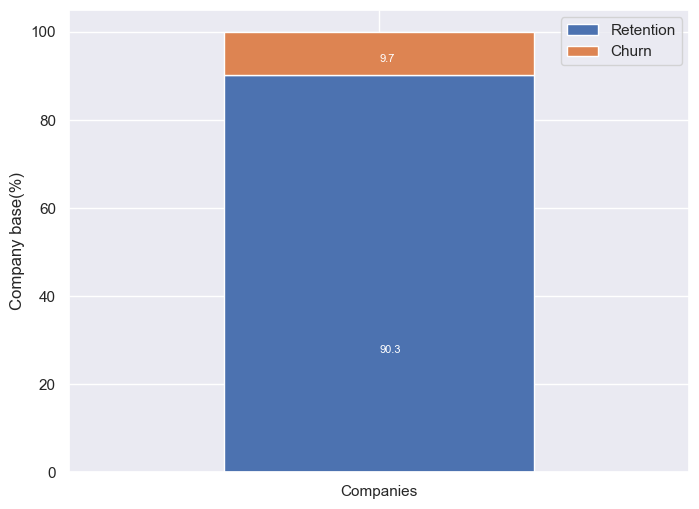

In [35]:
ax=churn_percentage.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
for p in ax.patches:
    value=str(round(p.get_height(),1))
    if value=='0':
        countinue
    ax.annotate(value,((p.get_x()+p.get_width()/2)*0.5,p.get_y()+p.get_height()/2*0.6),
               color='white',size=(8))
plt.legend(['Retention','Churn'],loc="upper right")
plt.ylabel("Company base(%)");

In [31]:
#Now is about Dates
dates=merger_data[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()
dates['date_activ']=pd.to_datetime(dates['date_activ'],format='%Y-%m-%d')
dates['date_end']=pd.to_datetime(dates['date_end'],format='%Y-%m-%d')
dates['date_modif_prod']=pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal']=pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

In [32]:
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month=label.month_name()[:1]
    if label.month_name()=="January":
        month+=f'\n{label.year}'
    return month

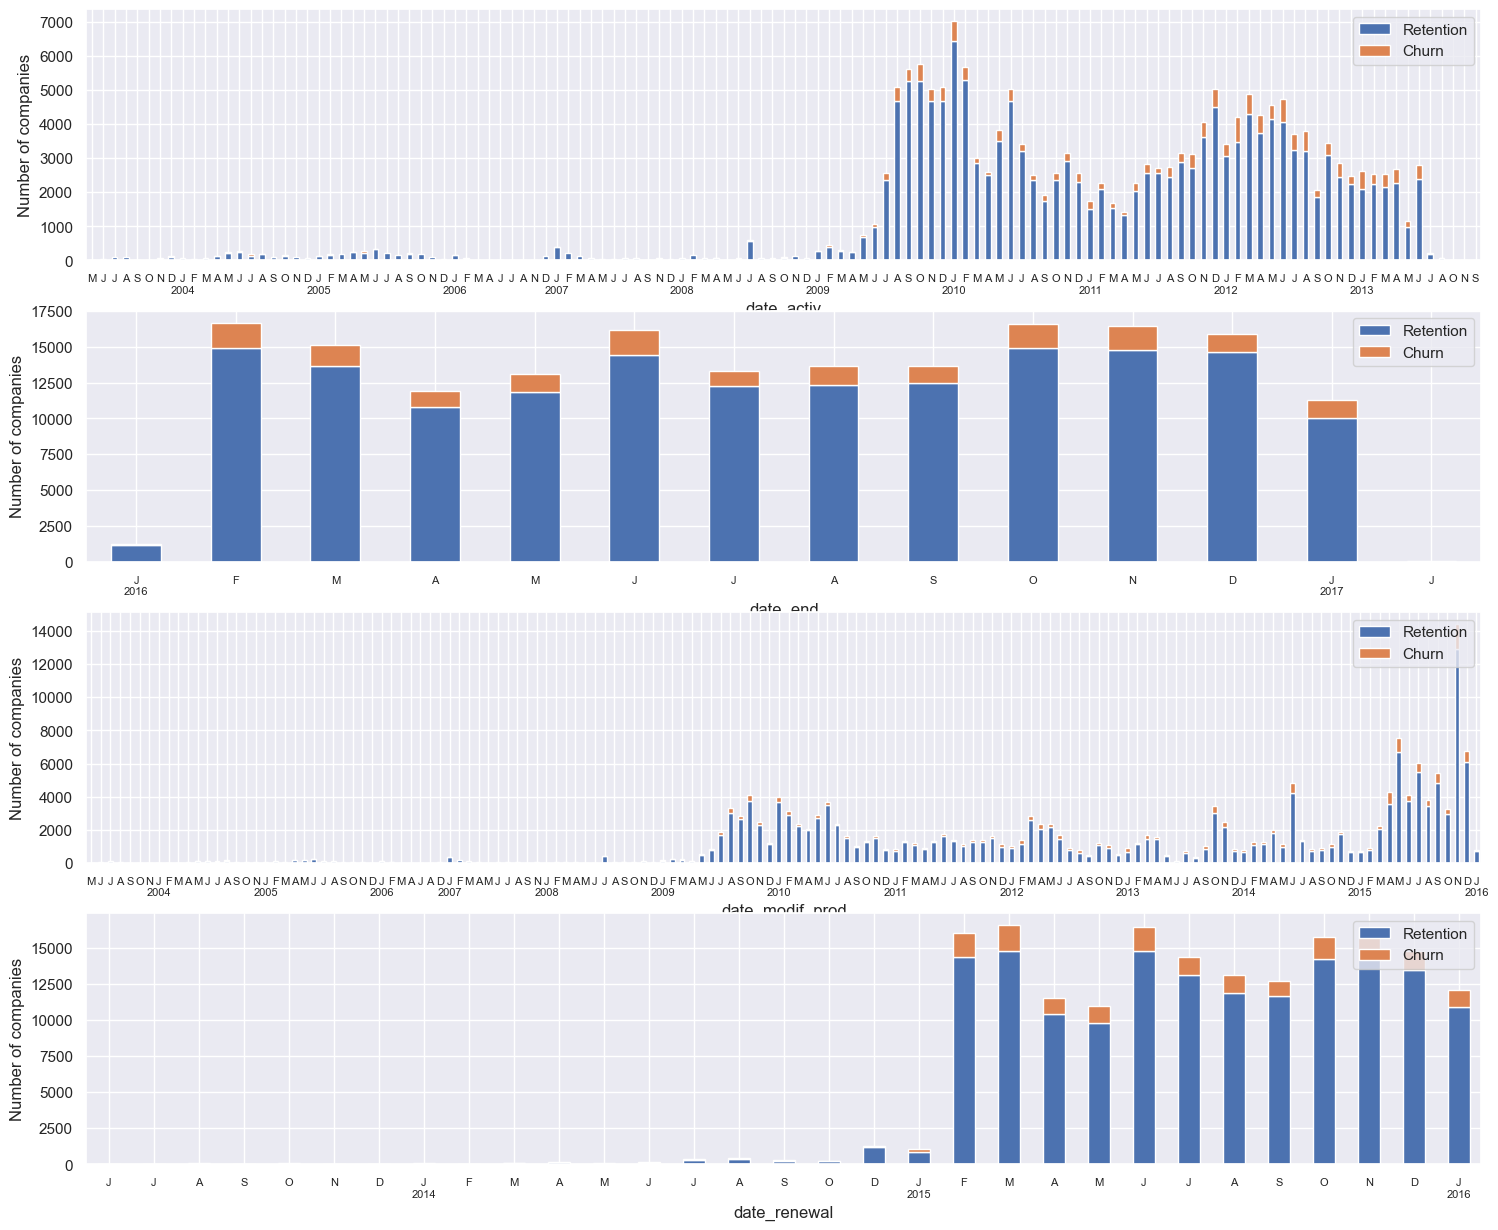

In [33]:
fig,axs=plt.subplots(nrows=4,figsize=(18,15))
date_activ=dates[['date_activ','churn','id']].set_index('date_activ').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_activ.plot(kind='bar',stacked=True,rot=0,ax=axs[0])
axs[0].set_xticklabels(map(lambda x:line_format(x),date_activ.index),fontsize=8)
axs[0].set_ylabel("Number of companies")
axs[0].legend(['Retention','Churn'],loc='upper right')
date_end=dates[['date_end','churn','id']].set_index('date_end').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_end.plot(kind='bar',stacked=True,rot=0,ax=axs[1])
axs[1].set_xticklabels(map(lambda x:line_format(x),date_end.index),fontsize=8)
axs[1].set_ylabel("Number of companies")
axs[1].legend(['Retention','Churn'],loc='upper right')
date_modif_prod=dates[['date_modif_prod','churn','id']].set_index('date_modif_prod').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_modif_prod.plot(kind='bar',stacked=True,rot=0,ax=axs[2])
axs[2].set_xticklabels(map(lambda x:line_format(x),date_modif_prod.index),fontsize=8)
axs[2].set_ylabel("Number of companies")
axs[2].legend(['Retention','Churn'],loc='upper right')
date_renewal=dates[['date_renewal','churn','id']].set_index('date_renewal').groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
date_renewal.plot(kind='bar',stacked=True,rot=0,ax=axs[3])
axs[3].set_xticklabels(map(lambda x:line_format(x),date_renewal.index),fontsize=8)
axs[3].set_ylabel("Number of companies")
axs[3].legend(['Retention','Churn'],loc='upper right');